# Naive Bayes Algorithm --TITANIC--BERNOULLI NAIVE BAYES

## Definition
Naive Bayes is a supervised machine learning classification algorithm based on Bayes’ Theorem.

## Types of Naive Bayes
1. Gaussian Naive Bayes  
2. Multinomial Naive Bayes  
3. Bernoulli Naive Bayes

### 3 Bernoulli Naive Bayes

- Used when features are **binary (0 or 1)**
- Works with presence or absence of a feature

Example:
- Word present (1) or not present (0)  
- Yes / No type data  

In [3]:
#importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
#loading the dataset
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
#checking for null values
data.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [10]:
#checking the percentage of null values
data.isnull().sum().sort_values(ascending=False)/len(data)*100


deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
sex             0.000000
pclass          0.000000
survived        0.000000
fare            0.000000
parch           0.000000
sibsp           0.000000
class           0.000000
adult_male      0.000000
who             0.000000
alive           0.000000
alone           0.000000
dtype: float64

In [ ]:
#removing the deck column due to high null values
data.drop('deck', axis=1, inplace=True)

In [12]:
#fill the age column withe mean value
data['age'].fillna(data['age'].mean(), inplace=True)

In [13]:
#dropping the rows with null values
data.dropna(inplace=True)

In [14]:
#checking for null values after handling
data.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [17]:
#checking for data types and info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.1+ KB


In [18]:
#categorial columns in the dataset
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
categorical_cols
#encoding the categorical columns
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [19]:
#splitting the data into features and target
X = data.drop('survived', axis=1)
y = data['survived']

In [ ]:
#spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#creating the model
model = BernoulliNB()
#training the model
model.fit(X_train, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"binarize binarize: float or None, default=0.0Threshold for binarizing (mapping to booleans) of sample features.If None, input is presumed to already consist of binary vectors.",0.0
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [22]:
#predicting the values
y_pred = model.predict(X_test)

In [23]:
#evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 1.0
Confusion Matrix:
[[109   0]
 [  0  69]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        69

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



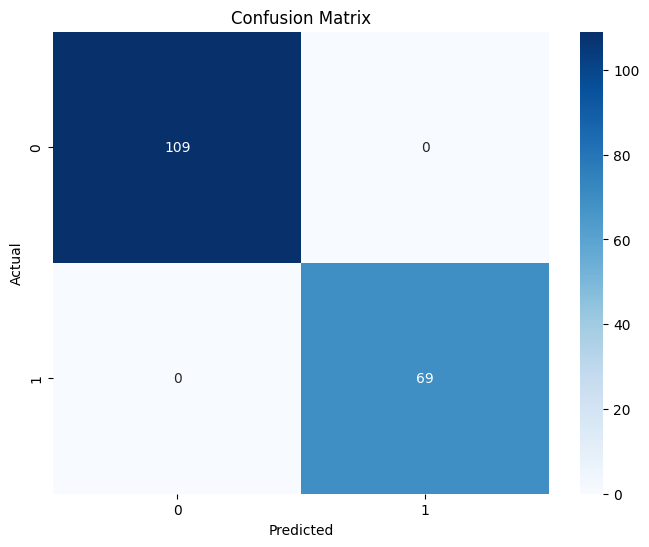

In [24]:
#visualizing the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
